<a href="https://colab.research.google.com/github/jeftersantiago/intro_ciencia_de_dados/blob/master/Tarefa%202%20-%20Analise%20Exploratoria%20de%20dados/Tarefa_02_Analise_exploratoria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import pearsonr, spearmanr

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/Tarefa 02 - Analise exploratoria de dados/data/iris.csv', header=(0))

## Exercício 01
Gere dados a partir de uma distribuição de Poisson. Varie a taxas $\lambda$ no intervalo $[1,10]$ e
mostre o gráfico da média em função da variância.


$$\text{ Distribuição de Poisson : } f(x) = \frac{\lambda^x} {x!} e^{-\lambda}$$

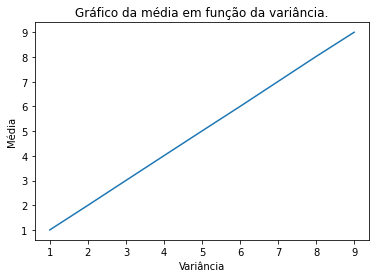

In [ ]:
var = []
mean = []
n = 1000000
for i in range(1, 10): 
  s = np.random.poisson(i, n)
  var.append(np.var(s))
  mean.append(np.mean(s))

plt.title("Gráfico da média em função da variância.")
plt.ylabel("Média")
plt.xlabel("Variância")

plt.plot(var, mean)
plt.show()

## Exercício 02
Considere os dados da Iris. Calcule a média, variância e `IQR` para cada atributo.

In [ ]:

print(data.columns)

X = np.array(data[data.columns[0:data.shape[1] - 1]], dtype=float)
mean = np.nanmean(X, axis = 0)
var = np.var(X, axis = 0)

print("Média de cada atributo: ", mean)
print("Variância de cada atributo: ", var)
print("IQR de cada atributo:")

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
 
# Outra forma de calcular o IQR
# for i in range(len(data.columns) - 1):
#    print("IQR - ", data.columns[i], " = ", iqr(X[:, i]))

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Média de cada atributo:  [5.84333333 3.054      3.75866667 1.19866667]
Variância de cada atributo:  [0.68112222 0.18675067 3.09242489 0.57853156]
IQR de cada atributo:
sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64


## Exercício 03
Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

In [ ]:
classes = np.array(data[data.columns[-1]])
cl = np.unique(classes)

X = np.array(data)
X_tmp = []

N = len(X)

for i in np.arange(0, len(cl)):
    a = np.argwhere(classes == cl[i])
    index = np.random.choice(a[:, 0], N)
    X_tmp.append(X[index, :])

X = np.array(X_tmp)
# print(X)
# print(cl)

In [ ]:
vecSet = X[0]
vecVer = X[1]
vecVir = X[2]

In [ ]:
def create_box_plot(X, species): 
  df = pd.DataFrame(X, columns = data.columns )
  # mostra o boxplot
  sns.boxplot(data=df)
  plt.title("Boxplot de todas váriaveis da espécie " + str(species))

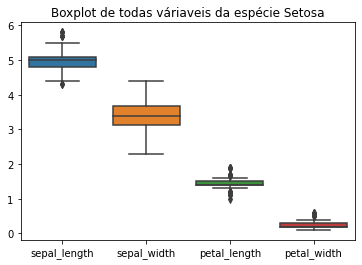

In [ ]:
create_box_plot(vecSet, "Setosa")

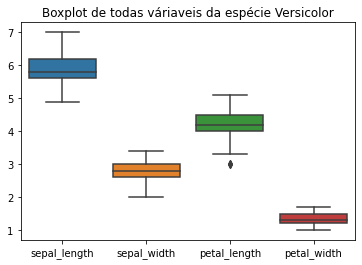

In [ ]:
create_box_plot(vecVer, "Versicolor")

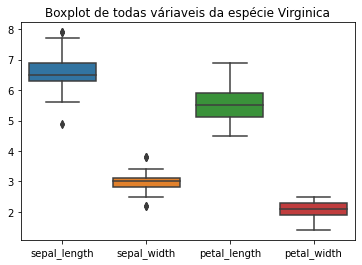

In [ ]:
create_box_plot(vecVir, "Virginica")

## Exercício 04
Para a função $\log()$, investigue como as correlações de Pearson e Spearman variam de acordo
com o intervalo dos dados.

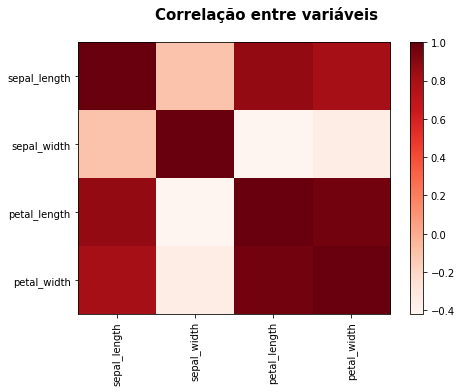

In [ ]:
corr = data.corr()

plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap = 'Reds', interpolation = 'none', aspect = 'auto')

plt.xticks(range(len(corr)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle("Correlação entre variáveis", fontsize = 15, fontweight = 'bold')

plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
N = 100
x = np.linspace(1, 50000, N)
z = np.log(x)

corrp, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corrp= int(corrp * 100) / 100 
corrs = int(corrs * 100) / 100

100


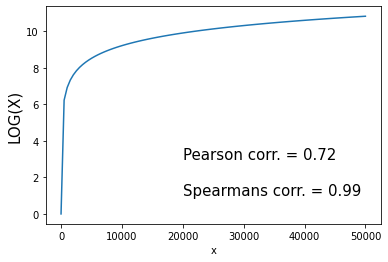

In [ ]:
plt.ylabel("LOG(X)", fontsize = 15)
plt.xlabel("x", fontsize = 10)

string = 'Pearson corr. = ' + str(corrp)
plt.text(20000, 3, string, fontsize = 15)

string = 'Spearmans corr. = ' + str(corrs)
plt.text(20000, 1, string, fontsize = 15)

plt.plot(x, z)
plt.show()

Separando o intervalo em 4, sendo o primeiro o primeiro 1/4 de N, o segundo de 1/4 à 1/2, o terceiro de 1/2 à 3/4 e por fim, de 3/4 à 1.

In [ ]:
q1 = N - 3 * int(N/4)
X1 = x[0:q1]
q2 = N - int(N/2)
X2 = x[q1:q2]
q3 = N - int(N/4)
X3 = x[q2:q3]
X4 = x[q3:N]

corrp1, p_v1 = pearsonr(X1, np.log(X1))
corrp2, p_v2 = pearsonr(X2, np.log(X2))
corrp3, p_v3 = pearsonr(X3, np.log(X3))
corrp4, p_v4 = pearsonr(X4, np.log(X4))

print("Coeficiente de Pearson para cada intervalo")
print("X1 = ", [0,q1] , "-> Pearson corr. = ", corrp1)
print("X2 = ", [q1, q2], "-> Pearson corr. = ", corrp2)
print("X3 = ", [q2, q3] , "-> Pearson corr. = ", corrp3)
print("X4 = ", [q3, N], "-> Pearson corr. = ", corrp4)


corrs1, ps_v1 = spearmanr(X1, np.log(X1))
corrs2, ps_v2 = spearmanr(X2, np.log(X2))
corrs3, ps_v3 = spearmanr(X3, np.log(X3))
corrs4, ps_v4 = spearmanr(X4, np.log(X4))

print("\nCoeficiente de Spearman para cada intervalo")
print("X1 = ", [0,q1] , "-> Spearman corrs. = ", corrs1)
print("X2 = ", [q1, q2], "-> Spearman corrs. = ", corrs2)
print("X3 = ", [q2, q3] , "-> Spearman corrs. = ", corrs3)
print("X4 = ", [q3, N], "-> Spearman corrs. = ", corrs4)

x =  12627.0101010101
Coeficiente de Pearson para cada intervalo
X1 =  [0, 25] -> Pearson corr. =  0.68204450324109
X2 =  [25, 50] -> Pearson corr. =  0.99598041357775
X3 =  [50, 75] -> Pearson corr. =  0.9986248724019087
X4 =  [75, 100] -> Pearson corr. =  0.999308947647001

Coeficiente de Spearman para cada intervalo
X1 =  [0, 25] -> Spearman corrs. =  1.0
X2 =  [25, 50] -> Spearman corrs. =  1.0
X3 =  [50, 75] -> Spearman corrs. =  1.0
X4 =  [75, 100] -> Spearman corrs. =  1.0


Como esperado, o coeficiente de Pearson só apresenta valor altamente correlacionado, ou seja, próximo de 1, para intervalos a partir de 1/4 do total, isto é, a partir do ponto onde a função logaritmica começa a se estabilizar. Então a partir desse ponto o coeficiente apresenta uma relação alta até o limite final. 

O coeficiente de Spearman é constante em todos intervalos cálculados. Isto também era esperado, já que o modelo permite correlações não lineares.


## Exercício 05

Considere o código acima que mostra como a correlação de Pearson muda com a inclusão de
ruídos. Modifique a função  $𝑌= 0.5 \cdot 𝑋$, para $ Y =  0.5 \cdot X+\text{ruído}$ . Varie o ruído e calcule os **coeficientes** de **Pearson** e **Spearman**, mostrando os respectivos scatterplots com os valores dos
coeficientes (como feito no exemplo).

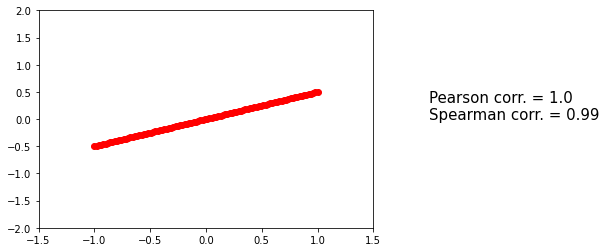

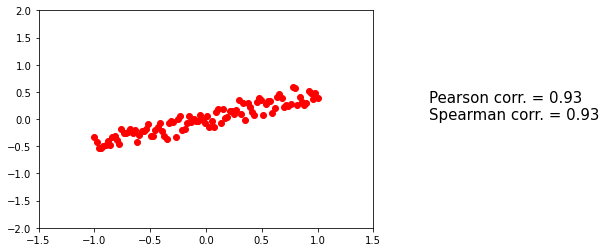

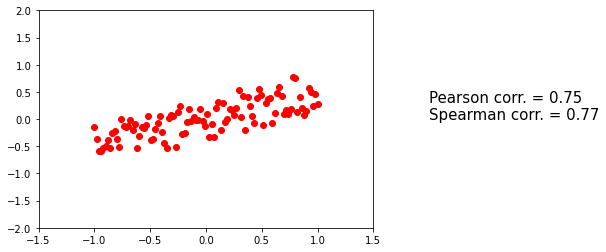

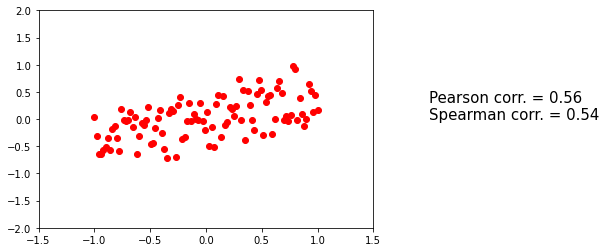

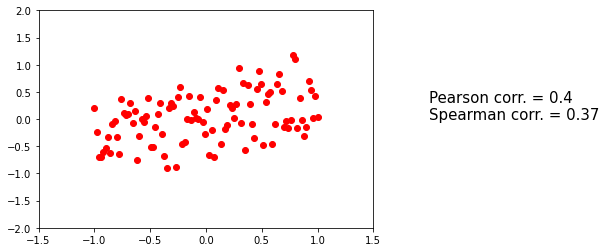

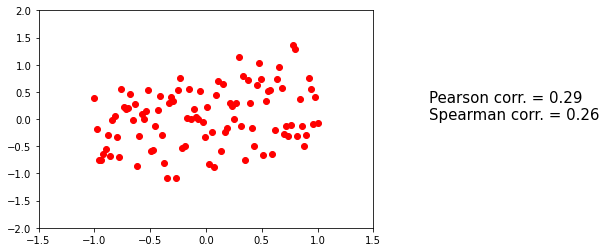

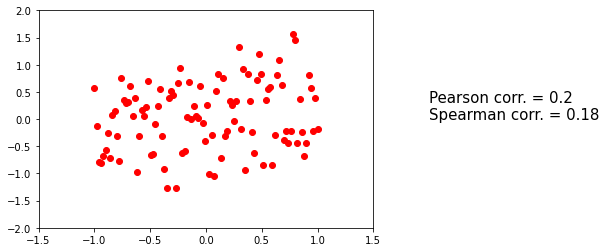

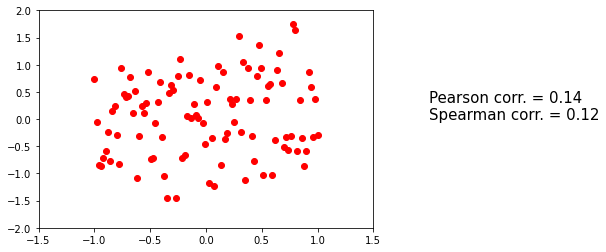

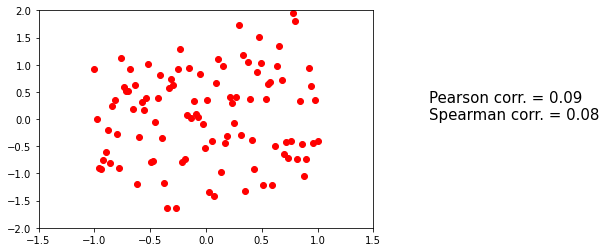

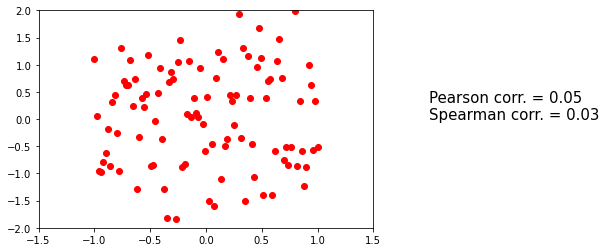

In [21]:
N = 100
X = np.linspace(-1,1, N)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,2,0.2):
    Y = 0.5*X + erro*sigma
    plt.plot(X,Y, 'ro')
    corrp, p_value = pearsonr(X, Y) # calcula a correlação
    corrs, ps_value = spearmanr(X, Y)
    corrp = int(corrp*100)/100
    corrs = int(corrs*100)/100
    string = 'Pearson corr. = '+ str(corrp)
    string2 = 'Spearman corr. = '+ str(corrs)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(2,0, string + "\n" + string2, fontsize=15)
    plt.show(True)

## Exercício 06

Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis $x$ e $y$.
 O que você pode dizer sobre esses dados?

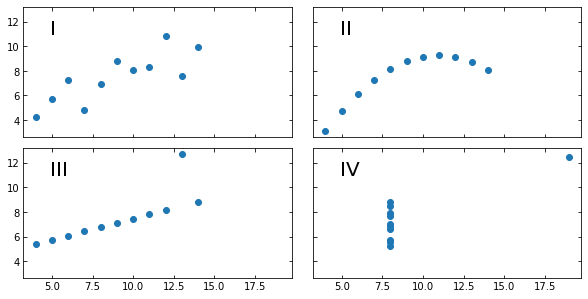

In [23]:

x =  [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
datasets = {
'I': (x, y1),
'II': (x, y2),
'III': (x, y3),
'IV': (x4, y4)
}
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5),
gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
  ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
  ax.tick_params(direction='in', top=True, right=True)
  ax.plot(x, y, 'o')
plt.show()

In [109]:
def calculations(X):
  X = np.array(X, dtype = float)
  print("Média = ", np.nanmean(X))
  print("Variância = ", np.var(X))
  print("Pearson corr. = ", pearsonr(X[0], X[1])[0])
  print("Spearman corr. = ", spearmanr(X[0], X[1])[0])

In [116]:
print("Dataset I")
calculations(datasets['I'])
print("\nDataset II")
calculations(datasets['II'])
print("\nDataset III")
calculations(datasets['III'])

print("\nDataset IV")
calculations(datasets['IV'])

Dataset I
Média =  8.250454545454545
Variância =  7.4378497933884296
Pearson corr. =  0.81642051634484
Spearman corr. =  0.8181818181818182

Dataset II
Média =  8.250454545454545
Variância =  7.438013429752067
Pearson corr. =  0.8162365060002427
Spearman corr. =  0.690909090909091

Dataset III
Média =  8.25
Variância =  7.436418181818181
Pearson corr. =  0.8162867394895982
Spearman corr. =  0.990909090909091

Dataset IV
Média =  8.250454545454545
Variância =  7.436022520661157
Pearson corr. =  0.8165214368885029
Spearman corr. =  0.5


Os quatro datasets tem sua média, variância, coeficientes de Pearson e Spearman equivalentes.
Apenas pelos dados numéricos pode aferir que os datasets são parecidos, porém, ao plotar os dados em gráficos de espalhamento notamos a disparidade desses dados. Portanto, é importante também visualizar os dados por meio de gráficos e não só depender dos tratamentos numéricos para retirar informação sobre os dados.